In [121]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

In [122]:
import numpy as np
int64_bool = df.apply(lambda x: (True if x.dtype == np.int64 else False),axis = 0)
df = df[df.columns[int64_bool]]


C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_11372\615468262.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(eliminate, 1, inplace=True)


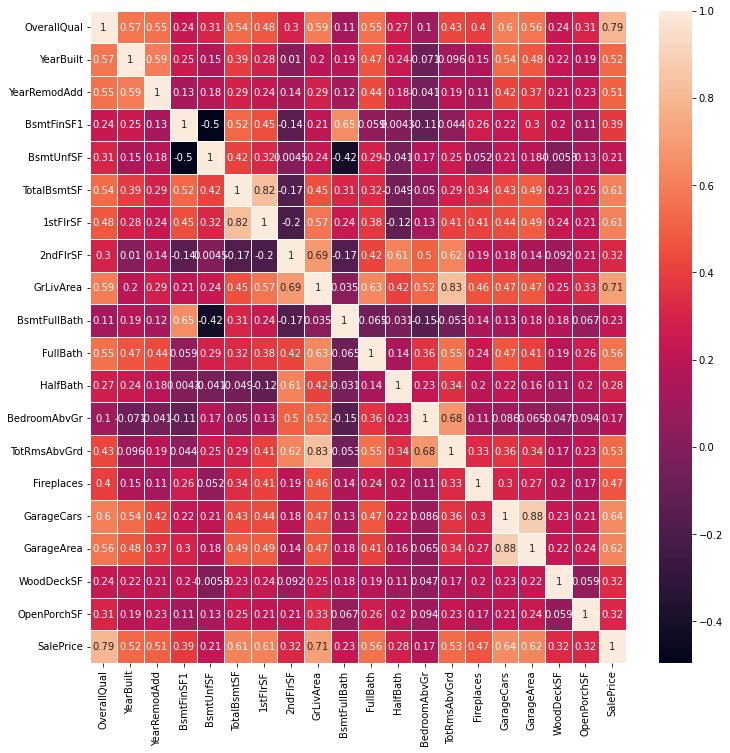

In [123]:

import matplotlib.pyplot as plt

eliminate = ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df.drop(eliminate, 1, inplace=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

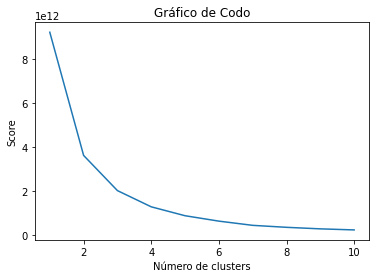

In [124]:
import pyclustertend
import sklearn.cluster as cluster

dfarray = df[['SalePrice', 'OverallQual']].values
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dfarray)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()



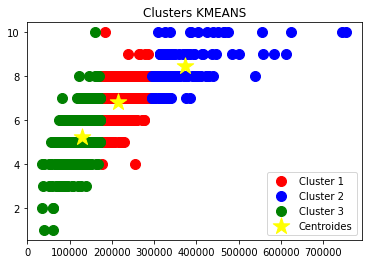

In [125]:
km = cluster.KMeans(n_clusters=3).fit(dfarray)
centroides = km.cluster_centers_
especies = km.predict(dfarray)
plt.scatter(dfarray[especies == 0, 0], dfarray[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(dfarray[especies == 1, 0], dfarray[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(dfarray[especies == 2, 0], dfarray[especies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Clusters KMEANS")
plt.legend()
plt.show()

# Cluster 1 (Economicas): 35,000 - 150,000
# Cluster 2 (Intermedias): 150,000 - 250,000
# Cluster 3 (Caras): 240,000 - 750,000
# Aproximadamente



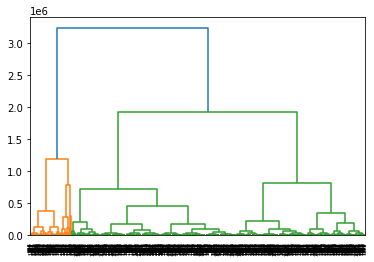

In [126]:
import scipy.cluster.hierarchy as sch
dendograma = sch.dendrogram(sch.linkage(dfarray[0:2500][:], method='ward'))

IndexError: list index out of range

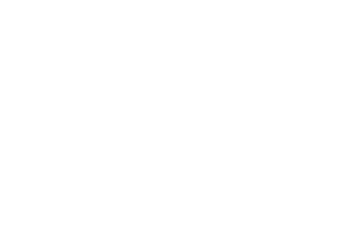

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import random

df['SalePrice'] = df['SalePrice'].astype('category')
y = df.pop("SalePrice") #La variable respuesta
X = df #El resto de los datos

random.seed(123)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)
y_train

arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

tree.plot_tree(arbol,feature_names=df.columns, class_names=['0','1','2'], filled=True )